In [4]:
import cv2
import matplotlib.pyplot as plt

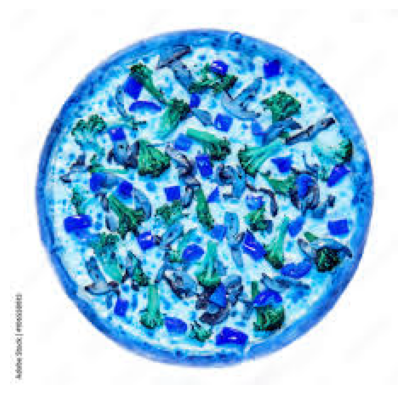

In [9]:
img="pizza.jpeg"
img_cv=cv2.imread(img)
fig,ax=plt.subplots(figsize=(5,5))
ax.imshow(img_cv)
ax.axis("off")
plt.show()

In [42]:
img_gray=cv2.cvtColor(img_cv,cv2.COLOR_RGB2GRAY)
ret,thresh=cv2.threshold(img_gray,127,255,0)
contour,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print(contour)
cv2.drawContours(img_cv,contour,-1,(0,255,0),1)
cv2.imshow('Contours', img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32), array([[[ 50, 297]],

       [[ 51, 296]],

       [[ 52, 296]],

       [[ 53, 297]],

       [[ 52, 298]],

       [[ 51, 298]]], dtype=int32), array([[[ 58, 296]],

       [[ 59, 295]],

       [[ 60, 296]],

       [[ 59, 297]]], dtype=int32), array([[[ 53, 296]],

       [[ 54, 295]],

       [[ 55, 296]],

       [[ 55, 297]],

       [[ 54, 298]],

       [[ 53, 297]]], dtype=int32), array([[[ 41, 296]],

       [[ 42, 295]],

       [[ 43, 295]],

       [[ 44, 295]],

       [[ 45, 295]],

       [[ 46, 295]],

       [[ 47, 295]],

       [[ 48, 295]],

       [[ 49, 295]],

       [[ 50, 296]],

       [[ 49, 297]],

       [[ 48, 298]],

       [[ 47, 298]],

       [[ 46, 298]],

       [[ 45, 298]],

       [[ 44, 297]],

       [[ 43, 298]],

       [[ 42, 297]]], dtype=int32), array([[[ 60, 295]],

       [[ 61, 294]],

       [[ 62, 29

In [43]:
area=cv2.contourArea(contour[0])
print(area)

249001.0


In [44]:
perimeter=cv2.arcLength(contour[0],True)
perimeter

1996.0

In [47]:
x, y, w, h = cv2.boundingRect(contour[0])
# Draw a rectangle on the image
cv2.rectangle(img_cv, (x, y), (x+w, y+h), (255, 0, 0), 2)
cv2.imshow('Contours', img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
import cv2

def shape_detect(image):
    shape_name = ''
    
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to the grayscale image
    _, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        # Correct typo in 'epsilon' calculation and use proper value
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        # Number of vertices of the approximated polygon
        vert = len(approx)
        
        # Get bounding rectangle for placing text on the shape
        x, y, w, h = cv2.boundingRect(approx)
        
        # Draw contours
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)
        
        # Identify shapes based on the number of vertices
        if vert == 3:
            shape_name = "TRIANGLE"
        elif vert == 4:
            # Calculate aspect ratio for distinguishing square and rectangle
            aspect = w / float(h)
            if 0.95 <= aspect <= 1.05:
                shape_name = "SQUARE"
            else:
                shape_name = "RECTANGLE"
        elif vert == 5:
            shape_name = "PENTAGON"
        elif vert == 6:
            shape_name = "HEXAGON"
        elif vert > 6:
            # Calculate area, perimeter, and circularity to identify circles
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            circularity = 4 * 3.14 * (area / (perimeter ** 2))
            if 0.7 <= circularity <= 1.2:
                shape_name = "CIRCLE"
            else:
                shape_name = "ELLIPSE OR OTHER"
        else:
            shape_name = "UNKNOWN"
        
        # Put the name of the shape on the image
        cv2.putText(image, shape_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

# Example usage
image = cv2.imread('circle1.jpg')
output_image = shape_detect(image)

# Show the result
cv2.imshow("Detected Shapes", output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
detect_shapes(img_cv)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]